In [1]:
import pandas as pd
import os
import numpy as np
os.getcwd()
os.chdir('/Users/margueritevergne/Downloads/')

In [2]:
os.getcwd()

'/Users/margueritevergne/Downloads'

In [3]:
gender_equality=pd.read_excel('./Gender_Indicators.xlsx')
gender_equality.head()

,Series Name,Series Code,Country Name,Country Code,2017 [YR2017]
0,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,Afghanistan,AFG,7.16068
1,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,Albania,ALB,38.103
2,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,Algeria,DZA,29.2687
3,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,American Samoa,ASM,..
4,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,Andorra,AND,..


In [4]:
#Deleting Series Code
del gender_equality['Series Code']
gender_equality.head()

,Series Name,Country Name,Country Code,2017 [YR2017]
0,Account ownership at a financial institution o...,Afghanistan,AFG,7.16068
1,Account ownership at a financial institution o...,Albania,ALB,38.103
2,Account ownership at a financial institution o...,Algeria,DZA,29.2687
3,Account ownership at a financial institution o...,American Samoa,ASM,..
4,Account ownership at a financial institution o...,Andorra,AND,..


In [5]:
#Renaming the columns
gender_equality.columns = ['Indicators', 'Country Name', 'Country Code','Value']
gender_equality.head()

,Indicators,Country Name,Country Code,Value
0,Account ownership at a financial institution o...,Afghanistan,AFG,7.16068
1,Account ownership at a financial institution o...,Albania,ALB,38.103
2,Account ownership at a financial institution o...,Algeria,DZA,29.2687
3,Account ownership at a financial institution o...,American Samoa,ASM,..
4,Account ownership at a financial institution o...,Andorra,AND,..


In [6]:
#Replacing dots with Nan
ge=gender_equality['Value'].replace('..',np.nan)

In [7]:
#Converting Value to numeric
gender_equality['Value']=pd.to_numeric(ge)
#checking the conversion
gender_equality.dtypes

Indicators       object
Country Name     object
Country Code     object
Value           float64
dtype: object

In [8]:
#Creating a pivot table so I can have a column for each Indicators. I also rename the indicators
gender_equality=gender_equality.pivot_table(index=['Country Code','Country Name'], columns='Indicators', values=['Value'])
flat = pd.DataFrame(gender_equality.to_records())
flat

,Country Code,Country Name,"('Value', 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)')","('Value', 'Contraceptive prevalence, modern methods (% of women ages 15-49)')","('Value', 'GDP per capita (Current US$)')","('Value', 'School enrollment, primary and secondary (gross), gender parity index (GPI)')","('Value', 'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)')"
0,ABW,Aruba,NaN,NaN,25655.102022,NaN,NaN
1,AFG,Afghanistan,7.160685,NaN,550.068459,0.64980,4.194000
2,AGO,Angola,NaN,NaN,4100.289786,NaN,16.754000
3,ALB,Albania,38.102959,NaN,4537.579056,0.95217,43.740002
4,AND,Andorra,NaN,NaN,39146.548836,NaN,NaN
5,ARB,Arab World,25.635403,NaN,6235.420578,0.93583,66.397780
6,ARE,United Arab Emirates,76.416718,NaN,40698.849336,NaN,97.567001
7,ARG,Argentina,50.757252,NaN,14398.358771,NaN,78.570000
8,ARM,Armenia,40.906437,NaN,3936.798320,NaN,59.472000
9,ASM,American Samoa,NaN,NaN,11394.475297,NaN,NaN


In [9]:
flat.columns=['country_code','country_name','bank_account_ownership','modern_contraceptive_prevalence_in_percent','GDP_per_capita_in_USD','gender_parity_index','female_employment']

In [10]:
flat

,country_code,country_name,bank_account_ownership,modern_contraceptive_prevalence_in_percent,GDP_per_capita_in_USD,gender_parity_index,female_employment
0,ABW,Aruba,NaN,NaN,25655.102022,NaN,NaN
1,AFG,Afghanistan,7.160685,NaN,550.068459,0.64980,4.194000
2,AGO,Angola,NaN,NaN,4100.289786,NaN,16.754000
3,ALB,Albania,38.102959,NaN,4537.579056,0.95217,43.740002
4,AND,Andorra,NaN,NaN,39146.548836,NaN,NaN
5,ARB,Arab World,25.635403,NaN,6235.420578,0.93583,66.397780
6,ARE,United Arab Emirates,76.416718,NaN,40698.849336,NaN,97.567001
7,ARG,Argentina,50.757252,NaN,14398.358771,NaN,78.570000
8,ARM,Armenia,40.906437,NaN,3936.798320,NaN,59.472000
9,ASM,American Samoa,NaN,NaN,11394.475297,NaN,NaN


In [11]:
[i for i in flat._get_numeric_data()]

['bank_account_ownership',
 'modern_contraceptive_prevalence_in_percent',
 'GDP_per_capita_in_USD',
 'gender_parity_index',
 'female_employment']

In [12]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
results = []
url = 'https://www.fifa.com/fifa-world-ranking/ranking-table/women/'
with requests.Session() as s:
   for page in range(4):
      res = s.get(url.format(page))
      soup1 = bs(res.content, 'lxml')
      Country_Name = [item.text.strip() for item in soup1.select('div>span.fi-t__nText')]
      Ranking = [item.text.strip() for item in soup1.select('tr>td:first-of-type>span.text' )] 
      Total_Points = [item.text.strip() for item in soup1.select('tr>td:first-of-type+td+td>span.text ')]
      #print(Ranking)
   data = list(zip(Country_Name, Ranking,Total_Points))
   results.append(data)
newList = [item for sublist in results for item in sublist]
df = pd.DataFrame(newList)
df.head()

,0,1,2
0,USA,1,2101
1,Germany,2,2072
2,England,3,2049
3,France,4,2043
4,Canada,5,2006


In [13]:
#giving df columns names
df.columns=['country_name','football_team_ranking','football_team_total_points']

In [14]:
#Replacing the country name with same spelling as in flat dataframe
f = flat.country_name
d = df.country_name
list(set(d) - set(f))
df.country_name[0]=df.country_name[0].replace('USA','United States')
df.country_name[2]=df.country_name[2].replace('England','United Kingdom')
df.country_name[10]=df.country_name[10].replace('Korea DPR',"Korea, Dem. People's Rep.")
df.country_name[13]=df.country_name[13].replace('Korea Republic','Korea, Rep.')
df.country_name[15]=df.country_name[15].replace('China PR','China')
df.country_name[24]=df.country_name[24].replace('Russia','Russian Federation')
df.country_name[30]=df.country_name[30].replace('Republic of Ireland','Ireland')
df.country_name[45]=df.country_name[45].replace('Slovakia','Slovak Republic')
df.country_name[57]=df.country_name[57].replace('Venezuela','Venezuela, RB')
df.country_name[65]=df.country_name[65].replace('IR Iran','Iran, Islamic Rep.')
df.country_name[68]=df.country_name[68].replace("Côte d'Ivoire","Cote d'Ivoire")
df.country_name[75]=df.country_name[75].replace('Hong Kong','Hong Kong SAR, China')
df.country_name[99]=df.country_name[99].replace('Congo','Congo, Dem. Rep.')
df.country_name[123]=df.country_name[123].replace('FYR Macedonia','North Macedonia')
df.country_name[142]=df.country_name[142].replace('US Virgin Islands','Virgin Islands (U.S.)')


In [15]:
#checking the countrys left and drop them because we don't have gender parity information
df[df.country_name.isin(list(set(d) - set(f)))]
df.drop([19,32,39,58,95,108,110])
df.head()

,country_name,football_team_ranking,football_team_total_points
0,United States,1,2101
1,Germany,2,2072
2,United Kingdom,3,2049
3,France,4,2043
4,Canada,5,2006


In [16]:
#merging both dataframes into one:
fg=flat.merge(df, on='country_name',how='left')
fg

,country_code,country_name,bank_account_ownership,modern_contraceptive_prevalence_in_percent,GDP_per_capita_in_USD,gender_parity_index,female_employment,football_team_ranking,football_team_total_points
0,ABW,Aruba,NaN,NaN,25655.102022,NaN,NaN,154,742
1,AFG,Afghanistan,7.160685,NaN,550.068459,0.64980,4.194000,142,884
2,AGO,Angola,NaN,NaN,4100.289786,NaN,16.754000,NaN,NaN
3,ALB,Albania,38.102959,NaN,4537.579056,0.95217,43.740002,77,1325
4,AND,Andorra,NaN,NaN,39146.548836,NaN,NaN,153,747
5,ARB,Arab World,25.635403,NaN,6235.420578,0.93583,66.397780,NaN,NaN
6,ARE,United Arab Emirates,76.416718,NaN,40698.849336,NaN,97.567001,98,1212
7,ARG,Argentina,50.757252,NaN,14398.358771,NaN,78.570000,37,1626
8,ARM,Armenia,40.906437,NaN,3936.798320,NaN,59.472000,NaN,NaN
9,ASM,American Samoa,NaN,NaN,11394.475297,NaN,NaN,125,1047


In [17]:
#Replacing Nan by 0 in national_team_score
fg['football_team_ranking'].replace(np.nan,'0',inplace=True)
fg['football_team_total_points'].replace(np.nan,'0',inplace=True)

#Converting Value to numeric
fg['football_team_ranking']=pd.to_numeric(fg['football_team_ranking'])
fg['football_team_total_points']=pd.to_numeric(fg['football_team_total_points'])


#checking the conversion
fg.dtypes

country_code                                   object
country_name                                   object
bank_account_ownership                        float64
modern_contraceptive_prevalence_in_percent    float64
GDP_per_capita_in_USD                         float64
gender_parity_index                           float64
female_employment                             float64
football_team_ranking                           int64
football_team_total_points                      int64
dtype: object

In [18]:
#Changing the order of columns
cols = fg.columns.tolist()
cols = ['country_code','country_name','GDP_per_capita_in_USD',
 'bank_account_ownership','female_employment',
 'gender_parity_index',
 'modern_contraceptive_prevalence_in_percent',
 'football_team_ranking','football_team_total_points']
fg=fg[cols]
fg

,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,modern_contraceptive_prevalence_in_percent,football_team_ranking,football_team_total_points
0,ABW,Aruba,25655.102022,NaN,NaN,NaN,NaN,154,742
1,AFG,Afghanistan,550.068459,7.160685,4.194000,0.64980,NaN,142,884
2,AGO,Angola,4100.289786,NaN,16.754000,NaN,NaN,0,0
3,ALB,Albania,4537.579056,38.102959,43.740002,0.95217,NaN,77,1325
4,AND,Andorra,39146.548836,NaN,NaN,NaN,NaN,153,747
5,ARB,Arab World,6235.420578,25.635403,66.397780,0.93583,NaN,0,0
6,ARE,United Arab Emirates,40698.849336,76.416718,97.567001,NaN,NaN,98,1212
7,ARG,Argentina,14398.358771,50.757252,78.570000,NaN,NaN,37,1626
8,ARM,Armenia,3936.798320,40.906437,59.472000,NaN,NaN,0,0
9,ASM,American Samoa,11394.475297,NaN,NaN,NaN,NaN,125,1047


In [19]:
#checking % of values = 0
(fg[[i for i in fg._get_numeric_data()]]==0).sum()/fg.shape[0]

GDP_per_capita_in_USD                         0.00
bank_account_ownership                        0.00
female_employment                             0.00
gender_parity_index                           0.00
modern_contraceptive_prevalence_in_percent    0.00
football_team_ranking                         0.42
football_team_total_points                    0.42
dtype: float64

In [20]:
#Dropping modern_contraceptive_prevalence_in_percent columns because too many values are missing
fg.drop(['modern_contraceptive_prevalence_in_percent'],axis=1,inplace=True)
fg

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points
0,ABW,Aruba,25655.102022,NaN,NaN,NaN,154,742
1,AFG,Afghanistan,550.068459,7.160685,4.194000,0.64980,142,884
2,AGO,Angola,4100.289786,NaN,16.754000,NaN,0,0
3,ALB,Albania,4537.579056,38.102959,43.740002,0.95217,77,1325
4,AND,Andorra,39146.548836,NaN,NaN,NaN,153,747
5,ARB,Arab World,6235.420578,25.635403,66.397780,0.93583,0,0
6,ARE,United Arab Emirates,40698.849336,76.416718,97.567001,NaN,98,1212
7,ARG,Argentina,14398.358771,50.757252,78.570000,NaN,37,1626
8,ARM,Armenia,3936.798320,40.906437,59.472000,NaN,0,0
9,ASM,American Samoa,11394.475297,NaN,NaN,NaN,125,1047


In [21]:
#identifying missing GDP per capita
fg.loc[fg['GDP_per_capita_in_USD'] == 0]

,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points


In [22]:
#filling in GDP per Capita
fg.GDP_per_capita_in_USD[253]=36.350
fg.GDP_per_capita_in_USD[25]=91.477
fg.GDP_per_capita_in_USD[49]=15.00
fg.GDP_per_capita_in_USD[50]=43.80
fg.GDP_per_capita_in_USD[67]=1.657
fg.GDP_per_capita_in_USD[76]=40.00
fg.GDP_per_capita_in_USD[82]=61.700
fg.GDP_per_capita_in_USD[89]=37.600
fg.GDP_per_capita_in_USD[106]=84.600
fg.GDP_per_capita_in_USD[134]=139.100
fg.GDP_per_capita_in_USD[146]=115.700
fg.GDP_per_capita_in_USD[169]=31.100
fg.GDP_per_capita_in_USD[189]=39.737
fg.GDP_per_capita_in_USD[196]=17.000
fg.GDP_per_capita_in_USD[225]=29.100
fg.GDP_per_capita_in_USD[252]=42.300

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:1015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value
/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: Settin

In [23]:
fg.loc[fg['GDP_per_capita_in_USD'] == 0].index

Int64Index([], dtype='int64')

In [24]:
#dropping countries with no GDP and that are not relevant for our studies:islands depending on other countries that will probably never have a football team, countries at war = 7 rows...
fg.drop(fg.loc[fg['GDP_per_capita_in_USD'] == 0].index,inplace=True)

In [30]:
fg.drop(fg.loc[fg['GDP_per_capita_in_USD'].isna()].index,inplace=True)

In [31]:
#Standardizing the gender parity indicators:
#Bank account ownership
fg['bao_norm']=(fg.bank_account_ownership-fg.bank_account_ownership.mean())/fg.bank_account_ownership.std()

#female employment
fg['fe_norm']=(fg.female_employment-fg.female_employment.mean())/fg.female_employment.std()
fg.fe_norm
#GPI
fg['gpi_norm']=(fg.gender_parity_index)-1
fg.gpi_norm
fg.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points,bao_norm,fe_norm,gpi_norm
0,ABW,Aruba,25655.102022,NaN,NaN,NaN,154,742,NaN,NaN,NaN
1,AFG,Afghanistan,550.068459,7.160685,4.194000,0.64980,142,884,-1.864491,-1.706549,-0.35020
2,AGO,Angola,4100.289786,NaN,16.754000,NaN,0,0,NaN,-1.296235,NaN
3,ALB,Albania,4537.579056,38.102959,43.740002,0.95217,77,1325,-0.737042,-0.414648,-0.04783
4,AND,Andorra,39146.548836,NaN,NaN,NaN,153,747,NaN,NaN,NaN


In [192]:
import math
def gpi_rate(x,y,z):
    #creating a weight dataframe for each normalized indicators
    weight= pd.DataFrame(np.array([0.2, 0.3, 0.5]), columns=['weight'])
    weight
    if math.isnan(x) and math.isnan(y) and math.isnan(z):
        a=np.nan
    if math.isnan(x) and math.isnan(y):
        a=z
    elif math.isnan(z) and math.isnan(y):
        a=x
    elif math.isnan(x) and math.isnan(z):
        a=y
    elif math.isnan(x):
        a=y*0.4+z*0.6
    elif math.isnan(y):
        a=x*0.35+z*0.65
    elif math.isnan(z):
        a=x*0.45+y*0.55
    else:
        a=x*weight.weight[0]+y*weight.weight[1]+z*weight.weight[2]
        
    return a       

In [370]:
ll=[]
for i,j in fg[['bao_norm','fe_norm','gpi_norm']].iterrows():
    ll.append(gpi_rate(j.bao_norm,j.fe_norm,j.gpi_norm))
fg['gpi_rate']=ll
fg


,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points,bao_norm,fe_norm,gpi_norm,gpi_rate,bin,IncomeGroup_x,IncomeGroup_y,IncomeGroup_x,IncomeGroup_y
0,AFG,Afghanistan,-0.713923,7.160685,4.194000,0.64980,1.882420,0.134097,-1.864491,-1.706549,-0.35020,-1.059963,low_gdp,Low_income,Low_income,Low_income,Low_income
1,AGO,Angola,-0.517083,NaN,16.754000,NaN,-0.878031,-1.099535,NaN,-1.296235,NaN,-1.296235,moderate_gdp,Lower_middle_income,Lower_middle_income,Lower_middle_income,Lower_middle_income
2,ALB,Albania,-0.492838,38.102959,43.740002,0.95217,0.618833,0.749517,-0.737042,-0.414648,-0.04783,-0.295718,moderate_gdp,Upper_middle_income,Upper_middle_income,Upper_middle_income,Upper_middle_income
3,ARB,Arab World,-0.398702,25.635403,66.397780,0.93583,-0.878031,-1.099535,-1.191325,0.325543,-0.06417,-0.172687,moderate_gdp,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,1.512104,76.416718,97.567001,NaN,1.027069,0.591824,0.659004,1.343788,NaN,1.035635,high_gdp,High_income,High_income,High_income,High_income
5,ARG,Argentina,0.053888,50.757252,78.570000,NaN,-0.158758,1.169566,-0.275955,0.723189,NaN,0.273574,high_gdp,High_income,High_income,High_income,High_income
6,ARM,Armenia,-0.526148,40.906437,59.472000,NaN,-0.878031,-1.099535,-0.634891,0.099289,NaN,-0.231092,moderate_gdp,Upper_middle_income,Upper_middle_income,Upper_middle_income,Upper_middle_income
7,ATG,Antigua and Barbuda,0.076324,NaN,NaN,0.96232,2.018498,-0.005454,NaN,NaN,-0.03768,-0.037680,high_gdp,High_income,High_income,High_income,High_income
8,AUS,Australia,2.238132,99.195091,87.561996,0.93718,-0.761392,1.695673,1.488983,1.016942,-0.06282,0.571469,high_gdp,High_income,High_income,High_income,High_income
9,AUT,Austria,1.882583,98.375771,90.156998,0.96840,-0.430915,1.409594,1.459130,1.101716,-0.03160,0.606541,high_gdp,High_income,High_income,High_income,High_income


In [374]:
fg=fg.iloc[:,:13]

# Adding Income Group to the Data Base

In [375]:
group_income=pd.read_excel('total_pop_clean.xlsx')
group_income.rename(columns={'Country Code':'country_code'}, inplace=True)
fg=pd.merge(fg,group_income[['country_code','IncomeGroup']],on='country_code', how='left')
fg.head()

,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points,bao_norm,fe_norm,gpi_norm,gpi_rate,bin,IncomeGroup
0,AFG,Afghanistan,-0.713923,7.160685,4.194000,0.64980,1.882420,0.134097,-1.864491,-1.706549,-0.35020,-1.059963,low_gdp,Low_income
1,AGO,Angola,-0.517083,NaN,16.754000,NaN,-0.878031,-1.099535,NaN,-1.296235,NaN,-1.296235,moderate_gdp,Lower_middle_income
2,ALB,Albania,-0.492838,38.102959,43.740002,0.95217,0.618833,0.749517,-0.737042,-0.414648,-0.04783,-0.295718,moderate_gdp,Upper_middle_income
3,ARB,Arab World,-0.398702,25.635403,66.397780,0.93583,-0.878031,-1.099535,-1.191325,0.325543,-0.06417,-0.172687,moderate_gdp,NaN
4,ARE,United Arab Emirates,1.512104,76.416718,97.567001,NaN,1.027069,0.591824,0.659004,1.343788,NaN,1.035635,high_gdp,High_income


In [369]:
group_income

,Country Name,country_code,IncomeGroup,1960,1961,1962,1963,1964,1965,1966,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,High_income,54211,55438,56225,56695,57032,57360,57715,...,101353,101453,101669,102053,102577,103187,103795,104341,104822,105264
1,Afghanistan,AFG,Low_income,8996351,9166764,9345868,9533954,9731361,9938414,10152331,...,27294031,28004331,28803167,29708599,30696958,31731688,32758020,33736494,34656032,35530081
2,Angola,AGO,Lower_middle_income,5643182,5753024,5866061,5980417,6093321,6203299,6309770,...,21759420,22549547,23369131,24218565,25096150,25998340,26920466,27859305,28813463,29784193
3,Albania,ALB,Upper_middle_income,1608800,1659800,1711319,1762621,1814135,1864791,1914573,...,2947314,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457
4,Andorra,AND,High_income,13411,14375,15370,16412,17469,18549,19647,...,83861,84462,84449,83751,82431,80788,79223,78014,77281,76965
5,United Arab Emirates,ARE,High_income,92634,101078,112472,125566,138529,150362,160481,...,6894278,7666393,8270684,8672475,8900453,9006263,9070867,9154302,9269612,9400145
6,Argentina,ARG,High_income,20619075,20953077,21287682,21621840,21953929,22283390,22608748,...,40382389,40799407,41223889,41656879,42096739,42539925,42981515,43417765,43847430,44271041
7,Armenia,ARM,Upper_middle_income,1874120,1941491,2009526,2077575,2144998,2211316,2276031,...,2908220,2888584,2877311,2875581,2881922,2893509,2906220,2916950,2924816,2930450
8,American Samoa,ASM,Upper_middle_income,20013,20486,21117,21882,22698,23520,24321,...,57030,56227,55637,55320,55230,55307,55437,55537,55599,55641
9,Antigua and Barbuda,ATG,High_income,55339,56144,57144,58294,59524,60781,62059,...,92478,93581,94661,95719,96777,97824,98875,99923,100963,102012


# Model

In [37]:
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [38]:
fg.GDP_per_capita_in_USD=(fg.GDP_per_capita_in_USD-fg.GDP_per_capita_in_USD.mean())/fg.GDP_per_capita_in_USD.std()

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [39]:
#Standardizing football team total points
fg.football_team_total_points=(fg.football_team_total_points-fg.football_team_total_points.mean())/fg.football_team_total_points.std()
fg.football_team_ranking=(fg.football_team_ranking-fg.football_team_ranking.mean())/fg.football_team_ranking.std()

In [ ]:
import numpy as np
np.cov()

In [224]:
#Dropping rows with Nans in Gpi Rate
#fg[fg.gpi_rate.isna()].index
#fg1=fg.drop(fg[fg.gpi_rate.isna()].index)


In [203]:
endog_tr=train.gpi_rate
exog_tr=train[['GDP_per_capita_in_USD','football_team_total_points']]

endog_t=test.gpi_rate
exog_t=test[['GDP_per_capita_in_USD','football_team_total_points']]

In [227]:
results = smf.OLS(endog_tr, sm.add_constant(exog_tr)).fit()
# Inspect the results
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gpi_rate   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     92.99
Date:                Fri, 21 Jun 2019   Prob (F-statistic):           2.91e-27
Time:                        12:23:49   Log-Likelihood:                -117.72
No. Observations:                 158   AIC:                             241.4
Df Residuals:                     155   BIC:                             250.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.0057      0.041     -0.139      0.890      -0.087       0.075
GDP_per_capita_in_USD          0.5152      0.046     11.220      0.000       0.424       0.606
football_team_total_points     0.1500      0.043      3.525      0.001       0.066       0.234
==============================================================================
Omnibus:                        8.890   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.477
Skew:                          -0.593   Prob(JB):                      0.00875
Kurtosis:                       2.814   Cond. No.                         1.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Testing with GLS

In [132]:
ols_res=results.resid
resid_fit=sm.OLS(ols_res[1:].reset_index(drop=True),sm.add_constant(ols_res[:-1]).reset_index(drop=True)).fit()
resid_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.237
Date:                Thu, 20 Jun 2019   Prob (F-statistic):              0.136
Time:                        21:06:35   Log-Likelihood:                -171.52
No. Observations:                 226   AIC:                             347.0
Df Residuals:                     224   BIC:                             353.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.035      0.092      0.927      -0.065       0.071
0              0.0991      0.066      1.496      0.136      -0.031       0.230
==============================================================================
Omnibus:                       10.524   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.965
Skew:                          -0.539   Prob(JB):                      0.00416
Kurtosis:                       3.066   Cond. No.                         1.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
rho=resid_fit.params[0]
from scipy.linalg import toeplitz
order=toeplitz(range(len(ols_res)))
sigma=rho**order

In [175]:
endog=fg.gpi_rate
endog.drop(fg[fg.gpi_rate.isna()].index,inplace=True)
exog=fg[['GDP_per_capita_in_USD','football_team_total_points']]
#exog=sm.add_constant(exog)
exog=exog.loc[fg.gpi_rate.index]

In [176]:
from statsmodels.regression.linear_model import GLS
model_gls=GLS(endog, exog, sigma)
model_gls_f=model_gls.fit()
model_gls_f.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:               gpi_rate   R-squared:                       0.506
Model:                            GLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     115.0
Date:                Thu, 20 Jun 2019   Prob (F-statistic):           3.85e-35
Time:                        21:24:12   Log-Likelihood:                -172.88
No. Observations:                 227   AIC:                             349.8
Df Residuals:                     225   BIC:                             356.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
GDP_per_capita_in_USD          0.4482      0.036     12.368      0.000       0.377       0.520
football_team_total_points     0.1636      0.036      4.507      0.000       0.092       0.235
==============================================================================
Omnibus:                        9.225   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.540
Skew:                          -0.502   Prob(JB):                      0.00848
Kurtosis:                       3.017   Cond. No.                         1.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
sigma.shape

(227, 227)

# Multicolinearity Test

In [166]:
def get_vif(exogs,fg):
    vif_array = np.array([])
    tolerance_array = np.array([])

    # create formula for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        formula = f"{exog} ~ {' + '.join(not_exog)}"

        # extract r-squared from the fit
        r_squared = smf.ols(formula, data=fg).fit().rsquared

        # calculate VIF
        vif = 1/(1-r_squared)
        vif_array = np.append(vif_array, vif).round(2)

        # calculate tolerance
        tolerance = 1-r_squared
        tolerance_array = np.append(tolerance_array, tolerance)

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_array, 'Tolerance': tolerance_array},
                          index=exogs)
    return df_vif

In [167]:
get_vif(['gpi_rate','football_team_total_points','GDP_per_capita_in_USD'],fg)

,VIF,Tolerance
gpi_rate,2.02,0.495413
football_team_total_points,1.21,0.829678
GDP_per_capita_in_USD,1.88,0.533071


In [ ]:
# there is no multicolinearity between variables because VIF<10 and Tolerance>0.1

# Normality of the residuals

In [168]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 10.883926330205847),
 ('Chi^2 two-tail prob.', 0.004330972505369235),
 ('Skew', -0.5362490216321999),
 ('Kurtosis', 2.97828742645013)]

In [ ]:
# Chi2 is < 0.05 so data is normally distributed

# Predictions

In [ ]:

from sklearn.model_selection import train_test_split

train, test = train_test_split(fg1, test_size=0.3)

In [ ]:
endog_tr=train.gpi_rate
exog_tr=train[['GDP_per_capita_in_USD','football_team_total_points']]

endog_t=test.gpi_rate
exog_t=test[['GDP_per_capita_in_USD','football_team_total_points']]

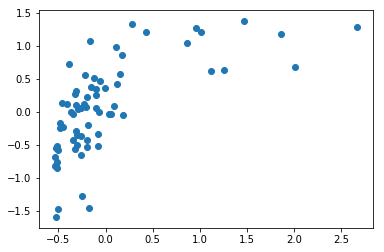

In [229]:
pred=results.predict(sm.add_constant(exog_t))
plt.scatter(pred,endog_t)

# Conclusion. 

Even if the model seemed good, the predictions are not fit to the actual data. We have outliers and therefore we cannot predict the missing values of GPI Rate.

# Visualization

In [230]:
fg.head()

,country_code,country_name,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points,bao_norm,fe_norm,gpi_norm,gpi_rate
1,AFG,Afghanistan,-0.713923,7.160685,4.194000,0.64980,1.882420,0.134097,-1.864491,-1.706549,-0.35020,-1.059963
2,AGO,Angola,-0.517083,NaN,16.754000,NaN,-0.878031,-1.099535,NaN,-1.296235,NaN,-1.296235
3,ALB,Albania,-0.492838,38.102959,43.740002,0.95217,0.618833,0.749517,-0.737042,-0.414648,-0.04783,-0.295718
5,ARB,Arab World,-0.398702,25.635403,66.397780,0.93583,-0.878031,-1.099535,-1.191325,0.325543,-0.06417,-0.172687
6,ARE,United Arab Emirates,1.512104,76.416718,97.567001,NaN,1.027069,0.591824,0.659004,1.343788,NaN,1.035635


In [232]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [314]:
fg.corr()

,GDP_per_capita_in_USD,bank_account_ownership,female_employment,gender_parity_index,football_team_ranking,football_team_total_points,bao_norm,fe_norm,gpi_norm,gpi_rate
GDP_per_capita_in_USD,1.000000,0.734431,0.638397,0.146618,-0.139347,0.321702,0.734431,0.638397,0.146618,0.681853
bank_account_ownership,0.734431,1.000000,0.723922,0.335495,-0.070492,0.461265,1.000000,0.723922,0.335495,0.869784
female_employment,0.638397,0.723922,1.000000,0.326524,-0.050057,0.333519,0.723922,1.000000,0.326524,0.907211
gender_parity_index,0.146618,0.335495,0.326524,1.000000,0.011093,0.050657,0.335495,0.326524,1.000000,0.418541
football_team_ranking,-0.139347,-0.070492,-0.050057,0.011093,1.000000,0.447577,-0.070492,-0.050057,0.011093,-0.026411
football_team_total_points,0.321702,0.461265,0.333519,0.050657,0.447577,1.000000,0.461265,0.333519,0.050657,0.408110
bao_norm,0.734431,1.000000,0.723922,0.335495,-0.070492,0.461265,1.000000,0.723922,0.335495,0.869784
fe_norm,0.638397,0.723922,1.000000,0.326524,-0.050057,0.333519,0.723922,1.000000,0.326524,0.907211
gpi_norm,0.146618,0.335495,0.326524,1.000000,0.011093,0.050657,0.335495,0.326524,1.000000,0.418541
gpi_rate,0.681853,0.869784,0.907211,0.418541,-0.026411,0.408110,0.869784,0.907211,0.418541,1.000000


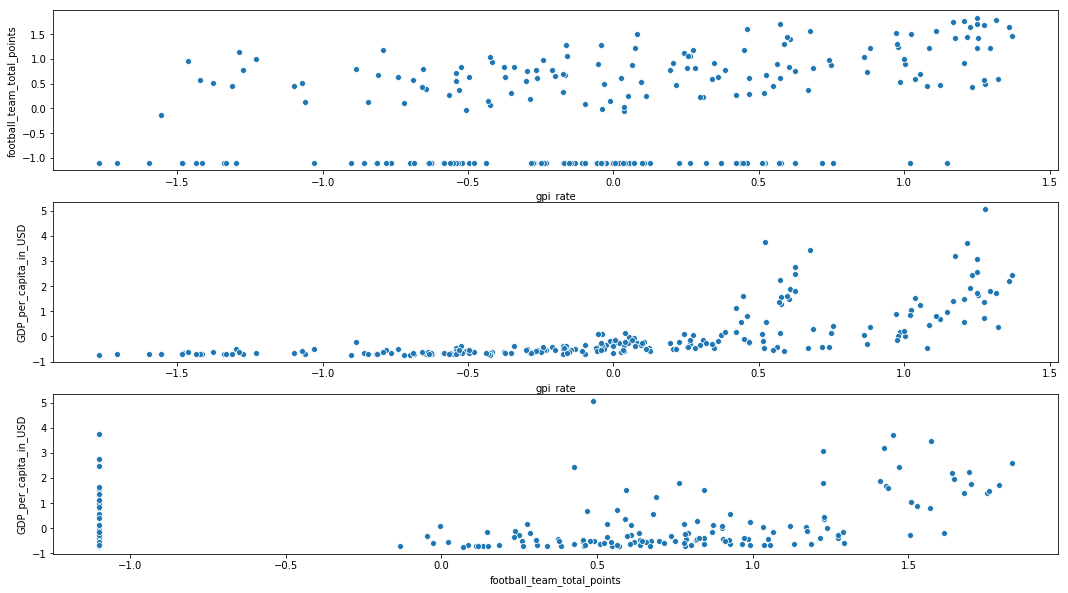

In [424]:
fig,[ax1,ax2,ax3]=plt.subplots(3,1,figsize=(18,10))

#plt.subplot(3,1,1)
sns.scatterplot(fg.gpi_rate,fg.football_team_total_points,ax=ax1)
#plt.title('GPI Rate versus Football Team Total Points')

#plt.subplot(3,1,2)
sns.scatterplot(fg.gpi_rate,fg.GDP_per_capita_in_USD,ax=ax2)
#plt.title('GPI Rate versus GDP Per Capita')

#plt.subplot(3,1,3)
sns.scatterplot(fg.football_team_total_points,fg.GDP_per_capita_in_USD,ax=ax3)
#plt.title('Football Team Total Points versus GDP Per Capita')


plt.show()

In [268]:
#pip install geopandas

import geopandas as gpd
import matplotlib.pyplot as plt 
from shapely.geometry import LineString
from descartes import PolygonPatch
os.getcwd()

'/Users/margueritevergne/Downloads'

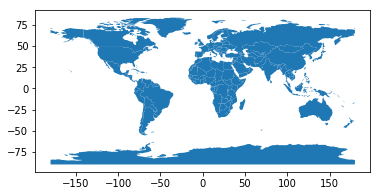

In [278]:
#charging worldmap from geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world
#renaming columns
world.columns=['pop_est','continent','country_name','country_code','gdp_md_est', 'geometry']
world.head()
world.plot()

In [354]:
fg1=pd.merge(fg,world[['country_code','geometry']],on='country_code', how='left')

In [303]:
from geopandas import GeoDataFrame
gdf = GeoDataFrame(fg1, geometry=fg1.geometry)

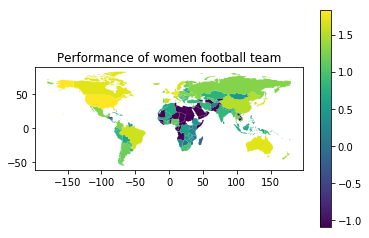

In [363]:

gdf.plot('football_team_total_points',legend=True)
plt.title('Performance of women football team')
plt.show()

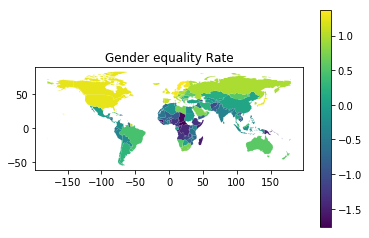

In [364]:
gdf.plot('gpi_rate',legend=True)
plt.title('Gender equality Rate')
plt.show()

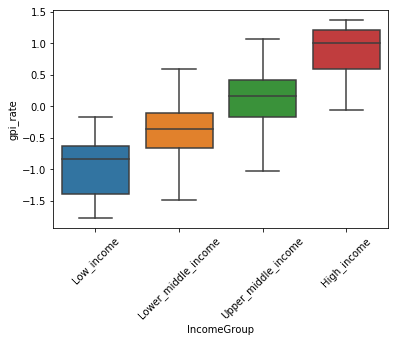

In [396]:
sns.boxplot(x="IncomeGroup", y="gpi_rate", data=fg)
plt.xticks(rotation=45)
plt.show()